# Xây dựng mô hình từ giải thuật SVM trên dữ liệu các con thú trong rừng. Dữ liệu lấy từ
https://www.kaggle.com/code/kareemellithy/animal-condition-predict-svm-knn

## Bài làm

### 1: TẢI THƯ VIỆN VÀ CHUẨN BỊ DỮ LIỆU

In [1]:
# 1. Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # Cần thiết cho confusion matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 2. Nạp dữ liệu 
df = pd.read_csv('../data/2.2.4 Bài tập thực hành 2/data.csv')
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [5]:
# 3. Tiền xử lý dữ liệu
if 'df' in locals():
    # 3.1 Xử lý giá trị thiếu (bỏ 2 dòng có 'Dangerous' là NaN)
    df.dropna(subset=['Dangerous'], inplace=True)

    # 3.2 Tạo 'target' (y)
    # Chuyển cột 'Dangerous' (Yes/No) thành số (1/0)
    target = df['Dangerous'].map({'Yes': 1, 'No': 0}).values
    
    # 3.3 Tạo 'data' (X)
    # Xác định các cột features (toàn bộ là chữ)
    feature_cols = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
    # Dùng get_dummies để chuyển tất cả cột chữ thành số
    df_processed = pd.get_dummies(df[feature_cols], drop_first=True)
    data = df_processed.values
    
    # 3.4 Lấy tên các features (để tham khảo)
    features_names = df_processed.columns.tolist()

    print("Tiền xử lý thành công. Dữ liệu đã sẵn sàng.")
    print(f"Số lượng features (sau get_dummies): {len(features_names)}")

    # 4. Chia dữ liệu (Giống random_state trong bài mẫu SVM)
    # Tỉ lệ 80:20, random_state=101
    X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                        test_size = 0.2, 
                                                        random_state=101)

    print(f"Tổng số mẫu (sau khi lọc NaN): {len(data)}")
    print(f"Số mẫu Huấn luyện (Train): {len(X_train)}")
    print(f"Số mẫu Kiểm tra (Test): {len(X_test)}")

Tiền xử lý thành công. Dữ liệu đã sẵn sàng.
Số lượng features (sau get_dummies): 1147
Tổng số mẫu (sau khi lọc NaN): 869
Số mẫu Huấn luyện (Train): 695
Số mẫu Kiểm tra (Test): 174


### 2: MÔ PHỎNG BÀI TOÁN 1 (TÌM KERNEL TỐT NHẤT)

In [6]:
if 'df' in locals():
    print("\n--- 2. Nhiệm vụ 1: Tìm Kernel Tốt nhất (Giống Bài toán 1 - Iris) ---")
    
    # 4. Tìm tham số kernel tối ưu
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    best_svm = None
    best_val_acc = -1
    best_kernel = None
    
    # Vòng lặp for để duyệt qua các kernel (Giống hệt bài mẫu)
    for kernel_name in kernels:
        # Khởi tạo mô hình
        clf = svm.SVC(kernel=kernel_name, probability=True)
        
        # Huấn luyện mô hình
        clf.fit(X_train, y_train)
        
        # Tính độ chính xác trên tập kiểm tra
        tmp_val_acc = clf.score(X_test, y_test)
        
        print(f"  Kernel: '{kernel_name}', Accuracy: {tmp_val_acc:.4f}")
        
        # Cập nhật mô hình tốt nhất
        if (tmp_val_acc > best_val_acc):
            best_val_acc = tmp_val_acc
            best_svm = clf # Lưu lại mô hình tốt nhất
            best_kernel = kernel_name
    
    # Hiển thị mô hình tốt nhất
    print(f"\n--- Kết quả Nhiệm vụ 1 ---")
    print(f"Best validation accuracy : {best_val_acc:.4f} with kernel: '{best_kernel}'")


--- 2. Nhiệm vụ 1: Tìm Kernel Tốt nhất (Giống Bài toán 1 - Iris) ---
  Kernel: 'linear', Accuracy: 1.0000
  Kernel: 'poly', Accuracy: 0.9655
  Kernel: 'rbf', Accuracy: 0.9655
  Kernel: 'sigmoid', Accuracy: 0.9713

--- Kết quả Nhiệm vụ 1 ---
Best validation accuracy : 1.0000 with kernel: 'linear'


### 3: MÔ PHỎNG BÀI TOÁN 2 (ĐÁNH GIÁ CHI TIẾT)


--- 3. Nhiệm vụ 2: Đánh giá chi tiết (Giống Bài toán 2 - Digits) ---
Sử dụng mô hình tốt nhất (kernel='linear') để dự đoán trên tập Test...

Đang tạo Ma trận nhầm lẫn (Confusion Matrix)...


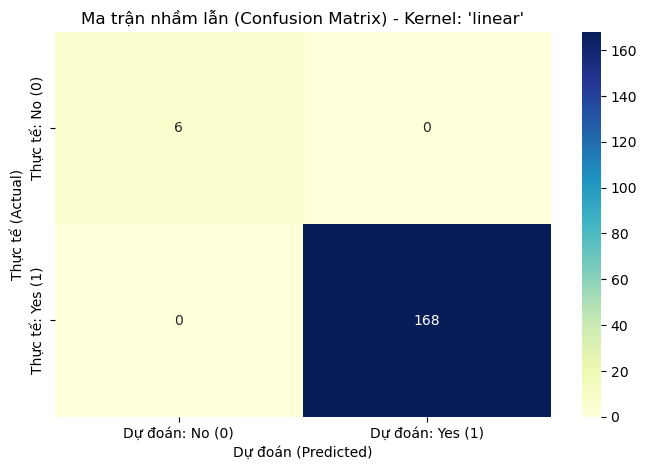


--- Báo cáo Phân loại (Classification Report) ---
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         6
         Yes       1.00      1.00      1.00       168

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



In [7]:
if 'df' in locals():
    print("\n--- 3. Nhiệm vụ 2: Đánh giá chi tiết (Giống Bài toán 2 - Digits) ---")
    
    # 1. Chuẩn bị:
    # Sử dụng mô hình tốt nhất (best_svm) đã tìm được ở trên
    print(f"Sử dụng mô hình tốt nhất (kernel='{best_kernel}') để dự đoán trên tập Test...")
    predictions = best_svm.predict(X_test)

    # 2. Đánh giá hiệu quả với Confusion Matrix
    print("\nĐang tạo Ma trận nhầm lẫn (Confusion Matrix)...")
    # (So sánh nhãn thực tế y_test với nhãn dự đoán predictions)
    cm = confusion_matrix(y_test, predictions)
    
    # Tạo nhãn cho ma trận
    conf_matrix = pd.DataFrame(data = cm, 
                               columns = ['Dự đoán: No (0)', 'Dự đoán: Yes (1)'],
                               index = ['Thực tế: No (0)', 'Thực tế: Yes (1)'])

    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Ma trận nhầm lẫn (Confusion Matrix) - Kernel: '{best_kernel}'")
    plt.xlabel("Dự đoán (Predicted)")
    plt.ylabel("Thực tế (Actual)")
    plt.show()

    # 3. In kết quả dạng văn bản (Classification Report)
    print("\n--- Báo cáo Phân loại (Classification Report) ---")
    # Cập nhật tên lớp cho đúng
    class_names = ['No', 'Yes']
    
    print(classification_report(y_test, predictions, target_names=class_names))

In [9]:
!jupyter nbconvert --to html "2.2.4. Bài tập thực hành 2.ipynb"

[NbConvertApp] Converting notebook 2.2.4. Bài tập thực hành 2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 345581 bytes to 2.2.4. Bài tập thực hành 2.html
